# # Détection de la Malaria par Deep Learning (CNN)

Ce projet utilise un Réseau de Neurones Convolutif (CNN) pour classifier des images de cellules sanguines afin de détecter la présence du parasite de la malaria.

Dataset : 27 558 images (Infectées vs Saines) issues du NIH.

Stack : TensorFlow/Keras, ImageDataGenerator, Scikit-Learn.

Enjeu : Fournir un outil de diagnostic rapide et fiable pour assister le personnel médical.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import os

In [ ]:
import requests,zipfile,io

# Importation et Acquisition des Données

In [ ]:
zip_file_url = 'https://moncoachdata.com/wp-content/uploads/cell_images.zip'

In [ ]:
r = requests.get(zip_file_url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [ ]:
data_dir = 'cell_images'

In [ ]:
os.listdir(data_dir)

['train', 'test']

In [ ]:
import seaborn as sns

In [ ]:
test_path = data_dir + '/test/'

In [ ]:
train_path = data_dir+ '/train/'

In [ ]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [ ]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [ ]:
os.listdir(train_path + 'parasitized')[0]

'C128P89ThinF_IMG_20151004_130810_cell_149.png'

In [ ]:
para_cell = train_path + 'parasitized' + '/C167P128ReThinF_IMG_20151201_105354_cell_247.png'

In [ ]:
os.listdir(train_path+ 'uninfected')[0]

'C201ThinF_IMG_20150930_143502_cell_27.png'

In [ ]:
len(imread(para_cell))

130

In [ ]:
un_infected_cell_path = train_path +'uninfected' +'/C167P128ReThinF_IMG_20151201_105102_cell_235.png'

In [ ]:
para_cell

'cell_images/train/parasitized/C167P128ReThinF_IMG_20151201_105354_cell_247.png'

In [ ]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

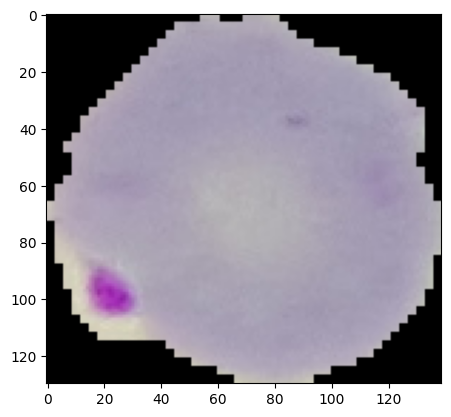

In [ ]:
plt.imshow(imread(para_cell))

In [ ]:
imread(un_infected_cell_path)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

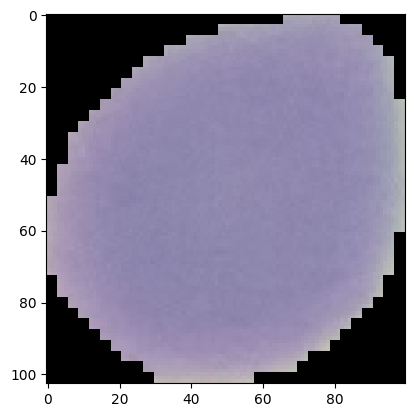

In [ ]:
plt.imshow(imread(un_infected_cell_path))

In [ ]:
test_path

'cell_images/test/'

In [ ]:
len(os.listdir(train_path+'parasitized'))

12480

In [ ]:
len(os.listdir(train_path+'uninfected'))

12480

In [ ]:
len(os.listdir(test_path+'uninfected'))

1300

In [ ]:
len(os.listdir(test_path+'parasitized'))

1300

In [ ]:
dim1 = []
dim2 = []

for image_filename in os.listdir(test_path+'uninfected'):
  img = imread(test_path + 'uninfected' + '/' + image_filename)
  d1,d2,colors = img.shape
  dim1.append(d1)
  dim2.append(d2)

In [ ]:
imread(un_infected_cell_path).max()

np.float32(0.7647059)

In [ ]:
np.mean(dim1)

np.float64(130.92538461538462)

In [ ]:
np.mean(dim2)

np.float64(130.75)

Avant de modéliser, nous devons comprendre la structure des données. Les images médicales réelles ont souvent des résolutions variées. Nous analysons la distribution des dimensions pour choisir une taille d'entrée (input shape) optimale.

Décision technique : La moyenne des dimensions étant proche de 130x130, nous fixons image_shape = (130, 130, 3) pour minimiser la perte d'information tout en optimisant le temps de calcul.

In [ ]:
image_shape = (130,130,3)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
help(ImageDataGenerator())

In [ ]:
un_infected_cell = imread(un_infected_cell_path)

In [ ]:
para_img = imread(para_cell)

# Data Augmentation

L'overfitting est un risque majeur en vision par ordinateur. Nous utilisons ImageDataGenerator pour générer des variations artificielles des images (rotations, zooms, basculements). Cela force le modèle à apprendre les caractéristiques robustes du parasite plutôt que de mémoriser des angles spécifiques.

In [ ]:
image_gen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, horizontal_flip=True, fill_mode='nearest')

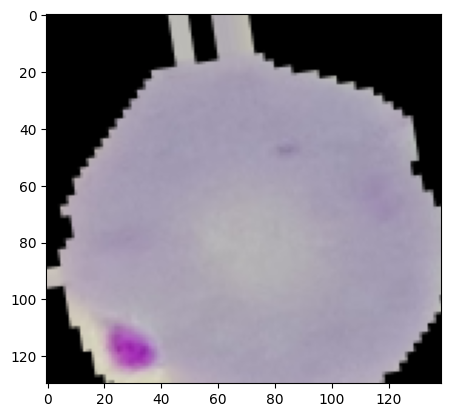

In [ ]:
plt.imshow(image_gen.random_transform(para_img))

In [ ]:
train_path

'cell_images/train/'

In [ ]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [ ]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten,Input
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

# Architecture du Réseau (CNN)

Nous concevons une architecture séquentielle optimisée pour l'extraction de caractéristiques spatiales :

Blocs Convolutionnels : 3 couches de Conv2D pour capturer les motifs (bords, textures, formes du parasite).

Pooling : MaxPool2D pour réduire la sensibilité de l'IA à la position exacte du parasite dans l'image.

Régularisation : Une couche de Dropout à 50% pour renforcer la robustesse du réseau.

Sortie : Une couche Dense avec activation Sigmoïde pour obtenir une probabilité binaire.

In [ ]:
model.add(Input(shape=(130,130,3)))

model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(units=128,activation='relu'))
model.add(Dropout(rate=0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,662,209 (6.34 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', patience=1)

In [ ]:
train_img_gen = image_gen.flow_from_directory(
    train_path,
    target_size=(130,130),
    color_mode='rgb',
    batch_size = 16,
    class_mode='binary'
    )

Found 24958 images belonging to 2 classes.


In [ ]:
test_img_gen = image_gen.flow_from_directory(
    test_path,
    target_size=(130,130),
    color_mode='rgb',
    batch_size = 16,
    class_mode='binary',
    shuffle=False
    )

Found 2600 images belonging to 2 classes.


In [ ]:
train_img_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

Pour éviter le sur-apprentissage, nous intégrons un callback EarlyStopping. Le processus s'arrêtera automatiquement dès que la perte sur l'ensemble de validation cessera de diminuer, garantissant ainsi une meilleure généralisation sur de nouvelles données.

In [ ]:
results = model.fit(train_img_gen, epochs=20, validation_data=test_img_gen, callbacks=[early_stop])

Epoch 1/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 936s 598ms/step - accuracy: 0.5459 - loss: 2.0538 - val_accuracy: 0.5615 - val_loss: 0.6803
Epoch 2/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 878s 563ms/step - accuracy: 0.5671 - loss: 0.6816 - val_accuracy: 0.5704 - val_loss: 0.6760
Epoch 3/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 895s 574ms/step - accuracy: 0.5801 - loss: 0.6794 - val_accuracy: 0.6023 - val_loss: 0.6705
Epoch 4/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 889s 570ms/step - accuracy: 0.5923 - loss: 0.6742 - val_accuracy: 0.5962 - val_loss: 0.6680
Epoch 5/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 897s 575ms/step - accuracy: 0.6262 - loss: 0.6384 - val_accuracy: 0.9323 - val_loss: 0.2269
Epoch 6/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 855s 548ms/step - accuracy: 0.9364 - loss: 0.1978 - val_accuracy: 0.9365 - val_loss: 0.1794
Epoch 7/20
1560/1560 ━━━━━━━━━━━━━━━━━━━━ 891s 571ms/step - accuracy: 0.9429 - loss: 0.1804 - val_accuracy: 0.9346 - val_loss: 0.1997


In [ ]:
loss = pd.DataFrame(model.history.history)

# Analyse des Performances

L'évaluation ne se limite pas à la précision globale (Accuracy). En diagnostic médical, nous surveillons particulièrement le Rappel (Recall) pour minimiser les faux négatifs (malades non détectés).

Seuil de décision : Nous appliquons un seuil de 0.8 pour être plus sélectif sur la détection des cas positifs.

<Axes: >

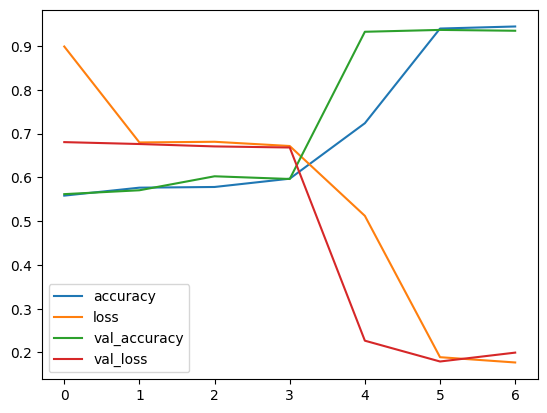

In [ ]:
loss.plot()

In [ ]:
y_pred = model.predict(test_img_gen)

163/163 ━━━━━━━━━━━━━━━━━━━━ 35s 213ms/step


In [ ]:
y_pred = y_pred > 0.8

In [ ]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(test_img_gen.classes, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1300
           1       0.94      0.95      0.94      1300

    accuracy                           0.94      2600
   macro avg       0.94      0.94      0.94      2600
weighted avg       0.94      0.94      0.94      2600



In [ ]:
confusion_matrix(test_img_gen.classes, y_pred)

array([[1216,   84],
       [  71, 1229]])

In [ ]:
from tensorflow.keras.preprocessing import image

In [ ]:
my_image = image.load_img(para_cell)

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,986,629 (19.02 MB)

 Trainable params: 1,662,209 (6.34 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,324,420 (12.68 MB)

In [ ]:
my_img_arr = image.img_to_array(my_image)

In [ ]:
my_img_arr.shape

(130, 139, 3)

In [ ]:
my_img_arr = np.expand_dims(my_image, axis=0)

In [ ]:
my_img_arr.shape

(1, 130, 139, 3)

In [ ]:
model.save('malaria_detector.keras')